In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Tesla.csv')

In [3]:
data['Date'][0].split('-')

['1', 'Apr', '11']

In [4]:
data.get('Date')

0        1-Apr-11
1        1-Apr-13
2        1-Apr-14
3        1-Apr-15
4        1-Apr-16
          ...    
3253    30-Sep-16
3254    30-Sep-19
3255    30-Sep-20
3256    30-Sep-21
3257    30-Sep-22
Name: Date, Length: 3258, dtype: object

In [5]:
data.isnull().sum()

Date        0
Price      80
Open       80
High       80
Low        80
Volume     80
Chg%      120
dtype: int64

In [6]:
data=data.dropna()

In [7]:
data.isnull().sum()

Date      0
Price     0
Open      0
High      0
Low       0
Volume    0
Chg%      0
dtype: int64

In [8]:
data

,Date,Price,Open,High,Low,Volume,Chg%
0,1-Apr-11,1.78,1.83,1.88,1.77,42.98M,-3.78%
1,1-Apr-13,2.93,2.82,3.11,2.78,211.59M,15.81%
2,1-Apr-14,14.46,13.93,14.54,13.91,110.57M,4.03%
3,1-Apr-15,12.51,12.58,12.82,12.4,56.92M,-0.56%
4,1-Apr-16,15.84,16.32,16.53,15.55,239.96M,3.39%
...,...,...,...,...,...,...,...
3253,30-Sep-16,13.60,13.48,13.67,13.3,38.79M,1.64%
3254,30-Sep-19,16.06,16.20,16.27,15.74,89.19M,-0.50%
3255,30-Sep-20,143.00,140.44,144.64,140.16,144.44M,2.37%
3256,30-Sep-21,258.49,260.33,263.04,258.33,53.87M,-0.75%


In [9]:
data['Dates']=data['Date'].apply(lambda x: int(x.split('-')[0]))
data['Months']=data['Date'].apply(lambda x: x.split('-')[1])
data['Year']=data['Date'].apply(lambda x: int(x.split('-')[2]))


In [10]:
months={'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}

In [11]:
data['Months']=data['Months'].replace(months)
data[data['Months'].isin(months)]
data

,Date,Price,Open,High,Low,Volume,Chg%,Dates,Months,Year
0,1-Apr-11,1.78,1.83,1.88,1.77,42.98M,-3.78%,1,4,11
1,1-Apr-13,2.93,2.82,3.11,2.78,211.59M,15.81%,1,4,13
2,1-Apr-14,14.46,13.93,14.54,13.91,110.57M,4.03%,1,4,14
3,1-Apr-15,12.51,12.58,12.82,12.4,56.92M,-0.56%,1,4,15
4,1-Apr-16,15.84,16.32,16.53,15.55,239.96M,3.39%,1,4,16
...,...,...,...,...,...,...,...,...,...,...
3253,30-Sep-16,13.60,13.48,13.67,13.3,38.79M,1.64%,30,9,16
3254,30-Sep-19,16.06,16.20,16.27,15.74,89.19M,-0.50%,30,9,19
3255,30-Sep-20,143.00,140.44,144.64,140.16,144.44M,2.37%,30,9,20
3256,30-Sep-21,258.49,260.33,263.04,258.33,53.87M,-0.75%,30,9,21


In [12]:
data=data.sort_values(['Year','Months','Dates'])
data=data.reset_index()
data=data.drop(columns=(['index','Date']))
data=data.rename(columns={'Dates':'Date'})
data.head(10)

,Price,Open,High,Low,Volume,Chg%,Date,Months,Year
0,1.59,1.72,2.03,1.55,257.92M,0.00%,30,6,10
1,1.46,1.67,1.73,1.35,123.45M,-8.18%,1,7,10
2,1.28,1.53,1.54,1.25,77.13M,-12.33%,2,7,10
3,1.07,1.33,1.33,1.06,103.19M,-16.41%,6,7,10
4,1.05,1.09,1.11,1,103.87M,-1.87%,7,7,10
5,1.16,1.08,1.17,1.04,115.79M,10.48%,8,7,10
6,1.16,1.17,1.19,1.1,60.88M,0.00%,9,7,10
7,1.14,1.20,1.20,1.13,33.05M,-1.72%,12,7,10
8,1.21,1.16,1.24,1.13,40.20M,6.14%,13,7,10
9,1.32,1.20,1.34,1.18,62.94M,9.09%,14,7,10


    Year       Price
0     10    1.555659
1     11    1.787063
2     12    2.077640
3     13    6.941235
4     14   14.900484
5     15   15.335605
6     16   13.996694
7     17   20.970445
8     18   21.162834
9     19   18.237137
10    20   96.577379
11    21  259.990363
12    22  262.733984
13    23  153.245000


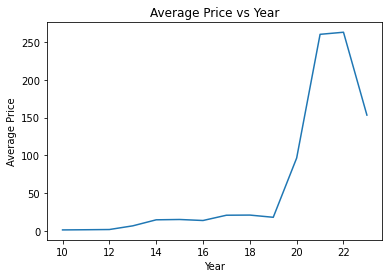

c:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


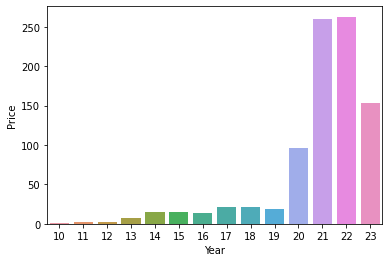

In [13]:

# Convert the 'Price' column to a numerical data type
data['Price'] = pd.to_numeric(data['Price'])
# Group the data by 'Year' and calculate the mean of the 'Price' column for each year
grouped_data = data.groupby('Year')['Price'].mean().reset_index()
print(grouped_data)
# Plot the resulting DataFrame
plt.plot(grouped_data['Year'], grouped_data['Price'])
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Price vs Year')
plt.show()

sns.barplot(grouped_data['Year'],grouped_data['Price'])

plt.show()

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [15]:
data['Price']=data['Price'].astype(int)
data['Chg%']=data['Chg%'].apply(lambda x: x.split('%')[0])
data['Volume']=data['Volume'].apply(lambda x: float(x.split('M')[0]))

    Year      Volume
0     10   21.710310
1     11   19.364206
2     12   18.449840
3     13  125.304701
4     14  102.905847
5     15   64.034032
6     16   68.575685
7     17   93.489271
8     18  128.476275
9     19  137.449960
10    20  225.899556
11    21   82.338831
12    22   87.063618
13    23  195.934286


c:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


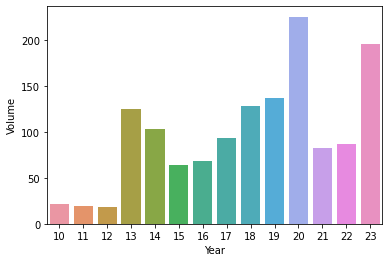

In [16]:
gr_val=data.groupby('Year')['Volume'].mean().reset_index()
print(gr_val)
sns.barplot(gr_val['Year'],gr_val['Volume'])
plt.show()


In [17]:
data.columns

Index(['Price', 'Open', 'High', 'Low', 'Volume', 'Chg%', 'Date', 'Months',
       'Year'],
      dtype='object')

In [18]:
x=data.drop(columns=(['Price','Chg%','High','Low','Volume','Chg%','Open']))
y=data['Price']

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [20]:
classy=RandomForestClassifier()
svc=SVC()


In [21]:
normal=GaussianNB()

In [22]:
x_train

,Date,Months,Year
604,21,11,12
146,27,1,11
1644,30,1,17
2473,5,6,20
837,25,10,13
...,...,...,...
2009,20,7,18
1180,18,3,15
1344,12,11,15
527,1,8,12


In [23]:
classy.fit(x_train,y_train)
svc.fit(x_train,y_train)

SVC()

In [24]:
normal.fit(x_train,y_train)

GaussianNB()

In [25]:
# Training Accuracy 
y_pred_training=classy.predict(x_train)
print("Error appox in per% /for random forest----> -+",(abs(y_pred_training-y_train)/y_train * 100 ).mean(),'%')

y_pred_training=svc.predict(x_train)
print("Error appox in per% /for svc----> -+",(abs(y_pred_training-y_train)/y_train * 100 ).mean(),'%')

y_pred_training=normal.predict(x_train)
print("Error appox in per% /for bayes----> -+",(abs(y_pred_training-y_train)/y_train * 100 ).mean(),'%')



Error appox in per% /for random forest----> -+ 0.0 %
Error appox in per% /for svc----> -+ 37.22103782728074 %
Error appox in per% /for bayes----> -+ 32.21483803965783 %


In [26]:
y_test_pred=classy.predict(x_test)
y_test_Pred_svc=svc.predict(x_test)

In [27]:
print(classy.predict(pd.DataFrame({ 'Date': [27], 'Months': [2], 'Year': [23]})))

[45]


In [28]:
y_test_pred_normal=normal.predict(x_test)

In [ ]:
data['Price'] = pd.to_numeric(data['Price'])

grouped_data = data.groupby('Year')['Price'].mean().reset_index()
print(grouped_data)
# Plot the resulting DataFrame
plt.plot(grouped_data['Year'], grouped_data['Price'])
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Price vs Year')
plt.show()

In [29]:
print(y_test.to_numpy())
print(y_test.shape)


[341  21   1 137   2  16  15  15  15 288  12 261 110   2 222  14  17 352
  13  18  22 275 365  11  13 351  15  19   1  17 272   1  14 201   2  14
  36   1 207   8  14  13  13   1  14 297   1 284  16  13  20   1   8  17
  51  27 243  17  23  20 221  22   2   9  19  14  11  10  15 289  16   2
  99  21   1  23  95  23   2 260 192  49  13  23 215  12 203   8  19  17
   1  16   1  14   1   5  19  15  10 290  20  28 288   1 149  16  18  14
   1   2   2  12  23  13   9  11   2  15   1  15  14  13  15  16  23  21
 255  23 123  18 148  22  19   1   1  36   1   2  15  21 299  17 245   1
   6   2  18   2  16 225   1  53 225  22  10  42   1  59  10  16 352  22
  23 231  12   8   1  16   2   1   1  16 294  12  16  14 245  23  15  13
  23  64   1  22 199   2  12  16 189  23   1  21   1  25  18   3  20   1
 233 272  23  16   1  23   2  20  13 308  22 280  11 149 309 236  15  22
   2  16  12  15 238  11  23  51 363  12  17   2   2  14   1  21  16  23
   8 343   2  20  10   1   1  24  20  14  21 214 20

In [37]:
print(y_test_pred)

[387  21   1 136   2  19  14  15  15 233  13  16 122   2 228  14  17 223
  13  17  23 281 194  10  13 337  16  22   1  17 270   1  14 226   2  14
 281   1 205   7  13  13  14   1  13 227   1  48  15  14  21   1   9  17
 223  27 246  15  23  23 228  22   2   9  20  15  12  11  17 296  16   2
  98  20   1  22  99  23   2 137 192 228  13  23 141  12 199   8  18  17
   1  15   1  13   1   4  19  14  10 301  20  21 290   1 244  15  18  14
   1   2   2  12  23  14   9  14   2  14   1  14  14  13  16  16  19  21
 267  22 123  18 153  18  21   1   1  34   1   2  15  22 283  17 251   1
   6   2  18   2  17 215   1  52 227  22  11  37   1 207  11  18 235  21
  22 218  12   8   1  16   1   1   1  16 293  11  16  14 362  23  19  13
  19  62   1  23  48   2  12  16 381  22   1  21   1  25  19   3  19   1
 222 236  23  16   1  22   2  20  13 325  21 215  10 153 306  94  14  24
   2  16  13  16 237  10  23  51 230  12  17   2   2  13   1  21  16  22
   8 284   2  21   9   1   1  24  20  13  20 218 21

In [38]:
print(y_test_Pred_svc)

[23 15  1 23  1 15 15 15 14 22 16 23 15  2 20 14 13 20 13 20 15 20 15  2
 13 23 15 14  1 14 20  1 14 15  2 13 20  1 20  2 13 13 13  1 13 15  1 20
 15 13 20  2  2 14 20 22 21 15 20 14 23 20  2  2 20 15 14  2 15 21 23  1
 22 20  1 20 20 15  2 15 20 20 14 14 15 13 20  2 15 14  1 13  1 14  1  2
 20 14  1 20 20 22 23  1 15 15 20 23  1  2  2  1 15 14  2 13  1 13  1 14
 13 13 15 16 16 20 20 14 20 16 23 16 22  1  1 20  1  1 23 13 23 14 23  1
  2  1 13  1 14 20  1 20 20 13  2 20  1 15  2 15 22 20 23 23 15  2  1 14
  1  1  1 13 20  2 15 13 20 16 16 13 16 15  1 20 20  2 16 14 22 20  1 14
  1 23 20  2 15  1 20 22 15 16  2 16  2 20 14 23 15 22  2 23 23 23 22 16
  2 14 16 13 23 14 23 20 20 15 14  1  2 16  1 15 16 14  2 20  2 13  2  1
  1 14 14 13 14 21 21  1 20 14  1 20 14 20 14 16 14  1 21 20 15 13 15 20
 14 13 20 21  2 16 21  2 21 15  1  1 21 20 22  2  2 21 13 20 20 13 14 23
 23 14  2 16  2 14 15  2 20  1  1 14  2 13  1 20  2 20 20  1 23 15 22 13
  1  1 13 20  2 14 14 13 14 13 22 22 15  2  1  1  2

In [39]:
y_test_pred_normal

array([191,  20,   1, 146,   1,  20,  13,  19,  14, 296,  13, 251, 139,
         1, 215,  13,  13, 307,  13,  19,  20, 281, 260,  13,  13, 339,
        15,  22,   1,  20, 239,   1,  14, 226,   2,  13,  37,   1, 226,
         7,  13,  13,  13,   1,  13, 300,   1, 239,  19,  13,  20,   2,
         8,  13,  54,  27, 263,  15,  20,  22, 248,  19,   2,   8,  19,
         9,  13,   8,  13, 296,  23,   1, 100,  19,   1,  19, 100, 191,
         2, 251, 205,  49,  14,  23, 180,  13, 205,   8,  23,  14,   1,
        13,   1,  13,   1,   5,  19,  14,   8, 239,  20,  27, 263,   2,
       139,   9, 133,  23,   1,   3,   2,   8,  23,  14,   8,  13,   2,
        13,   1,  14,  13,  13,  13,  13,  20,  20, 307,  14, 196,  19,
       141,  16,  22,   1,   1,  47,   1,   1,  23, 133, 308,  14, 251,
         1,   6,   2,  20,   1,  14, 215,   1,  54, 239,  23,   8,  49,
         1,  59,   8,  15, 339,  20,  27, 136,  15,   8,   1,  13,   2,
         1,   1,  13, 281,   8,  15,  13, 281,  20,  19,  15,  2

In [40]:
print("Error appox in per% /for random forest----> -+",(abs(y_test_pred-y_test)/y_test * 100 ).mean(),'%')

Error appox in per% /for random forest----> -+ 13.310784868994853 %


In [41]:
print("Error appox in per% /for Support Vector Machine ----> -+",(abs(y_test_Pred_svc-y_test)/y_test * 100 ).mean(),'%')

Error appox in per% /for Support Vector Machine ----> -+ 38.03624631406531 %


In [42]:
print("Error appox in per% /for Naive Bayes For Gussian Distribution ----> -+",(abs(y_test_pred_normal-y_test)/y_test * 100 ).mean(),'%')

Error appox in per% /for Naive Bayes For Gussian Distribution ----> -+ 32.00855391167187 %
